Kernel: linear, Dataset: .. _iris_dataset:, Accuracy: 1.00
Kernel: poly, Dataset: .. _iris_dataset:, Accuracy: 1.00
Kernel: rbf, Dataset: .. _iris_dataset:, Accuracy: 1.00
Kernel: linear, Dataset: .. _digits_dataset:, Accuracy: 0.98
Kernel: poly, Dataset: .. _digits_dataset:, Accuracy: 0.99
Kernel: rbf, Dataset: .. _digits_dataset:, Accuracy: 0.99
Kernel: linear, Dataset: .. _breast_cancer_dataset:, Accuracy: 0.96
Kernel: poly, Dataset: .. _breast_cancer_dataset:, Accuracy: 0.95
Kernel: rbf, Dataset: .. _breast_cancer_dataset:, Accuracy: 0.95
Kernel: linear, Dataset: .. _wine_dataset:, Accuracy: 1.00
Kernel: poly, Dataset: .. _wine_dataset:, Accuracy: 0.83
Kernel: rbf, Dataset: .. _wine_dataset:, Accuracy: 0.81
Kernel: linear, Dataset: .. _diabetes_dataset:, Accuracy: 0.01
Kernel: poly, Dataset: .. _diabetes_dataset:, Accuracy: 0.00
Kernel: rbf, Dataset: .. _diabetes_dataset:, Accuracy: 0.00


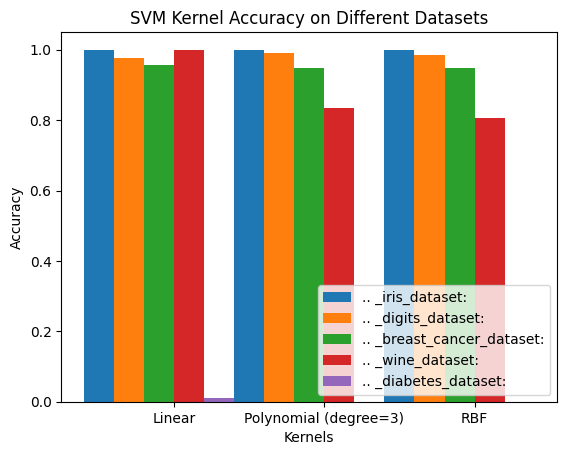

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the datasets
datasets_list = [datasets.load_iris(), datasets.load_digits(), datasets.load_breast_cancer(),
                 datasets.load_wine(), datasets.load_diabetes()]

# Iterate through the datasets
for dataset in datasets_list:
    X = dataset.data
    y = dataset.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the SVM classifiers with different kernels
    kernels = ['linear', 'poly', 'rbf']
    for kernel in kernels:
        if kernel == 'poly':
            # For the Polynomial kernel, specify the degree
            svm_classifier = SVC(kernel=kernel, degree=3)
        else:
            svm_classifier = SVC(kernel=kernel)

        # Fit the classifier to the training data
        svm_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = svm_classifier.predict(X_test)

        # Calculate and print accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Kernel: {kernel}, Dataset: {dataset.DESCR.splitlines()[0]}, Accuracy: {accuracy:.2f}")



# Data
datasets_list = [datasets.load_iris(), datasets.load_digits(), datasets.load_breast_cancer(),
                 datasets.load_wine(), datasets.load_diabetes()]

kernels = ['Linear', 'Polynomial (degree=3)', 'RBF']
accuracy_data = []

for dataset in datasets_list:
    dataset_accuracies = []
    X = dataset.data
    y = dataset.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for kernel in kernels:
        if kernel == 'Linear':
            svm_classifier = SVC(kernel='linear')
        elif kernel == 'Polynomial (degree=3)':
            svm_classifier = SVC(kernel='poly', degree=3)
        else:
            svm_classifier = SVC(kernel='rbf')

        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        dataset_accuracies.append(accuracy)

    accuracy_data.append(dataset_accuracies)

# Create a bar chart
num_datasets = len(datasets_list)
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots()
for i, dataset in enumerate(datasets_list):
    dataset_name = dataset.DESCR.splitlines()[0]
    ax.bar(x + i * width, accuracy_data[i], width, label=dataset_name)

ax.set_xlabel('Kernels')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Kernel Accuracy on Different Datasets')
ax.set_xticks(x + width * num_datasets / 2)
ax.set_xticklabels(kernels)
ax.legend(loc='lower right')

plt.show()


# CODE EXPLANATION


# 1. Import Necessary Libraries:
#    - We start by importing some libraries that help us work with data and create graphs.
#    - `numpy` helps with numerical calculations.
#    - `matplotlib.pyplot` allows us to create graphs.

# 2. Data Preparation:
#    - The code is dealing with several datasets. Think of a dataset as a collection of information, like grades of students.
#    - These datasets are already available, and the code loads them.

# 3. Kernels and Accuracy Data:
#    - The code is going to test three different "kernels" for Support Vector Machines (SVM). Kernels are like different methods for solving a problem.
#    - It also prepares a place to store accuracy results for each dataset.

# 4. For Each Dataset:
#    - The code goes through each dataset one by one.
#    - For each dataset, it calculates the accuracy of SVM using three different kernels: Linear, Polynomial, and RBF.
#    - Accuracy is like a score that tells us how well the SVM does in predicting the right answers.

# 5. Creating a Bar Chart:
#    - The code then creates a bar chart to show the accuracy results.
#    - Imagine a bar chart like a graph you might see in a math class, with bars going up and down to represent numbers.
#    - Each dataset has a group of bars, and each bar in that group represents a kernel's accuracy.

# 6. Customizing the Chart:
#    - The code adds labels and titles to the chart to make it clear.
#    - It sets labels on the chart's axes to show what is being measured (kernels and accuracy).
#    - It adds a title to the chart to explain what the chart is about.

# 7. Displaying the Chart:
#    - Finally, the code shows the chart on the screen so that you can see the results visually.
#    - It's like looking at a graph in a book or on a computer screen to understand the data better.

# In short, this code takes different datasets, tests three different ways of solving a problem (kernels), measures how well each method works (accuracy), and then shows the results in a bar chart to help you compare them visually.